<a href="https://colab.research.google.com/github/Bishalroybd/Weather-prediction/blob/main/Weather_prediction_(svm%2Crr%2Cknn%2Cdt)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, VotingClassifier,VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
import seaborn as sns
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
!pip install feature_engine --upgrade  # Upgrade feature_engine to the latest version
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures # Use DropCorrelatedFeatures instead of DropCorrelateweathereatures
from sklearn.pipeline import Pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
import pandas as pd

# Define file path
base_dir = "/content/drive/MyDrive/Colab Notebooks"
file_name = "sylhet 2019-01-01 to 2024.csv"
file_path = os.path.join(base_dir, file_name)

# Load CSV file
weather = pd.read_csv(file_path)

# Print weather
weather

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,sylhet,1/1/2019,78.7,46.5,61.2,78.7,46.5,61.2,49.9,70.3,...,15.9,7,NaN,2019-01-01T06:37:17,2019-01-01T17:14:26,0.83,Clear,Clear conditions throughout the day.,clear-day,"42618099999,41915099999,42515099999,4189109999..."
1,sylhet,1/2/2019,75.5,48.8,60.0,75.5,48.8,60.0,52.3,77.6,...,15.4,7,NaN,2019-01-02T06:37:34,2019-01-02T17:15:05,0.87,Clear,Clear conditions throughout the day.,clear-day,"42618099999,41915099999,42515099999,4189109999..."
2,sylhet,1/3/2019,78.3,46.2,61.0,78.3,46.2,61.0,53.7,79.3,...,15.4,7,NaN,2019-01-03T06:37:50,2019-01-03T17:15:45,0.90,Clear,Clear conditions throughout the day.,clear-day,"42618099999,41915099999,42515099999,4189109999..."
3,sylhet,1/4/2019,73.5,45.3,60.2,73.5,45.3,60.2,52.0,76.1,...,15.1,7,NaN,2019-01-04T06:38:05,2019-01-04T17:16:26,0.94,Clear,Clear conditions throughout the day.,clear-day,"42618099999,41915099999,42515099999,4189109999..."
4,sylhet,1/5/2019,76.5,43.1,62.2,76.5,38.9,62.1,52.4,72.4,...,15.9,7,NaN,2019-01-05T06:38:18,2019-01-05T17:17:07,0.97,Clear,Clear conditions throughout the day.,clear-day,"42618099999,41915099999,42515099999,4189109999..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,sylhet,11/26/2024,81.6,60.2,70.1,82.9,60.2,70.3,62.9,80.0,...,14.3,7,10.0,2024-11-26T06:16:56,2024-11-26T17:02:42,0.84,Clear,Clear conditions throughout the day.,clear-day,"42618099999,41915099999,42515099999,4189109999..."
2157,sylhet,11/27/2024,83.2,60.7,70.3,83.4,60.7,70.3,60.9,74.5,...,15.4,7,10.0,2024-11-27T06:17:40,2024-11-27T17:02:38,0.87,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42618099999,41915099999,42515099999,4189109999..."
2158,sylhet,11/28/2024,85.0,60.9,71.5,84.8,60.9,71.6,61.7,73.4,...,15.6,7,10.0,2024-11-28T06:18:23,2024-11-28T17:02:36,0.90,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42618099999,41915099999,42515099999,4189109999..."
2159,sylhet,11/29/2024,86.3,64.8,73.4,87.5,64.8,73.7,64.8,76.6,...,15.2,7,10.0,2024-11-29T06:19:06,2024-11-29T17:02:36,0.93,Clear,Clear conditions throughout the day.,clear-day,"42618099999,41915099999,42515099999,4189109999..."


In [ ]:
print(weather.index.name)

None


In [ ]:
# Columns to drop
columns_to_drop = ["name", "precip", "precipprob", "precipcover", "preciptype",
                   "snow", "snowdepth", "severerisk", "sunrise", "sunset",
                   "moonphase", "conditions", "description", "icon",
                   "stations", "visibility"]

# Drop specified columns if they exist, excluding 'datetime'
weather = weather.drop(columns=[col for col in columns_to_drop if col in weather.columns])

# Ensure the 'datetime' column is preserved
if 'datetime' not in weather.columns:
    print("Warning: 'datetime' column is missing!")

# Reset index if necessary
weather.reset_index(drop=True, inplace=True)

# Confirm the changes
print("Modified 'weather' DataFrame:")
print(weather.info())



Modified 'weather' DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          2161 non-null   object 
 1   tempmax           2161 non-null   float64
 2   tempmin           2161 non-null   float64
 3   temp              2161 non-null   float64
 4   feelslikemax      2161 non-null   float64
 5   feelslikemin      2161 non-null   float64
 6   feelslike         2161 non-null   float64
 7   dew               2161 non-null   float64
 8   humidity          2161 non-null   float64
 9   windgust          2161 non-null   float64
 10  windspeed         2161 non-null   float64
 11  winddir           2161 non-null   float64
 12  sealevelpressure  2161 non-null   float64
 13  cloudcover        2161 non-null   float64
 14  solarradiation    2161 non-null   float64
 15  solarenergy       2161 non-null   float64
 16  uvindex     

In [ ]:
weather

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,1/1/2019,78.7,46.5,61.2,78.7,46.5,61.2,49.9,70.3,11.4,5.5,56.2,1018.5,0.5,183.7,15.9,7
1,1/2/2019,75.5,48.8,60.0,75.5,48.8,60.0,52.3,77.6,11.6,4.9,45.3,1018.4,3.4,179.7,15.4,7
2,1/3/2019,78.3,46.2,61.0,78.3,46.2,61.0,53.7,79.3,11.0,8.6,65.0,1018.8,2.4,178.5,15.4,7
3,1/4/2019,73.5,45.3,60.2,73.5,45.3,60.2,52.0,76.1,11.2,5.4,27.7,1019.5,3.2,177.1,15.1,7
4,1/5/2019,76.5,43.1,62.2,76.5,38.9,62.1,52.4,72.4,11.0,6.9,31.2,1017.7,5.7,183.4,15.9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,11/26/2024,81.6,60.2,70.1,82.9,60.2,70.3,62.9,80.0,12.1,4.3,39.4,1013.2,16.0,165.1,14.3,7
2157,11/27/2024,83.2,60.7,70.3,83.4,60.7,70.3,60.9,74.5,13.9,4.9,44.3,1012.8,44.0,179.2,15.4,7
2158,11/28/2024,85.0,60.9,71.5,84.8,60.9,71.6,61.7,73.4,13.4,5.4,49.5,1013.6,66.9,180.8,15.6,7
2159,11/29/2024,86.3,64.8,73.4,87.5,64.8,73.7,64.8,76.6,13.0,4.5,54.5,1013.9,17.9,175.1,15.2,7


In [ ]:
missing_values = weather.isnull().sum()
print(missing_values)


datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
solarradiation      0
solarenergy         0
uvindex             0
dtype: int64


In [ ]:
def check(weather):
    l=[]
    columns=weather.columns
    for col in columns:
        dtypes=weather[col].dtypes
        nunique=weather[col].nunique()
        sum_null=weather[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check
check(weather)

,column,dtypes,nunique,sum_null
0,datetime,object,2161,0
1,tempmax,float64,259,0
2,tempmin,float64,308,0
3,temp,float64,321,0
4,feelslikemax,float64,473,0
5,feelslikemin,float64,336,0
6,feelslike,float64,461,0
7,dew,float64,323,0
8,humidity,float64,339,0
9,windgust,float64,114,0


In [ ]:
weather.shape


(2161, 17)

In [ ]:
weather.columns


Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'windgust', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'solarradiation',
       'solarenergy', 'uvindex'],
      dtype='object')

In [ ]:
def grab_col_names(weather, cat_th=10, car_th=20):
    """
    grab_col_names for givenweather

    :param dataframe:
    :param cat_th:
    :param car_th:
    :return:
    """

    cat_cols = [col for col in weather.columns if weather[col].dtypes == "O"]

    num_but_cat = [col for col in weather.columns if weather[col].nunique() < cat_th and
                   weather[col].dtypes != "O"]

    cat_but_car = [col for col in weather.columns if weather[col].nunique() > car_th and
                   weather[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in weather.columns if weather[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {weather.shape[0]}")
    print(f"Variables: {weather.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(weather)


Observations: 2161
Variables: 17
cat_cols: 0
num_cols: 16
cat_but_car: 1
num_but_cat: 0


In [ ]:
def outlier_thresholds(weather, variable, low_quantile=0.25, up_quantile=0.75):
    quantile_one = weather[variable].quantile(low_quantile)
    quantile_three = weather[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

# outlier detection
def check_outlier(weather, col_name):
    low_limit, up_limit = outlier_thresholds(weather, col_name)
    if weather[(weather[col_name] > up_limit) | (weather[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:

      print(col, check_outlier(weather, col))

tempmax True
tempmin False
temp False
feelslikemax False
feelslikemin True
feelslike False
dew False
humidity True
windgust True
windspeed True
winddir False
sealevelpressure False
cloudcover False
solarradiation True
solarenergy True
uvindex True


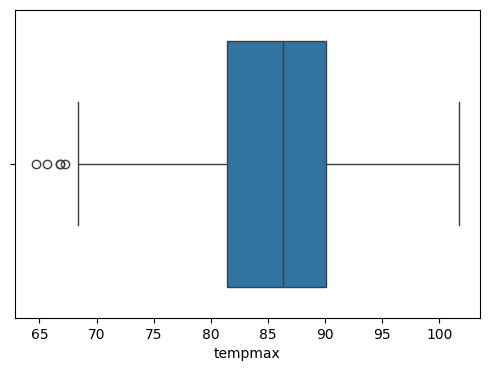

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(6, 4))

# Box plot to visualize outliers for a specific column
sns.boxplot(x=weather['tempmax'])
plt.show()



In [ ]:
def replace_with_thresholds(weather, variable):
    low_limit, up_limit = outlier_thresholds(weather, variable)
    weather.loc[(weather[variable] < low_limit), variable] = low_limit
    weather.loc[(weather[variable] > up_limit), variable] = up_limit


for col in num_cols:
        replace_with_thresholds(weather,col)

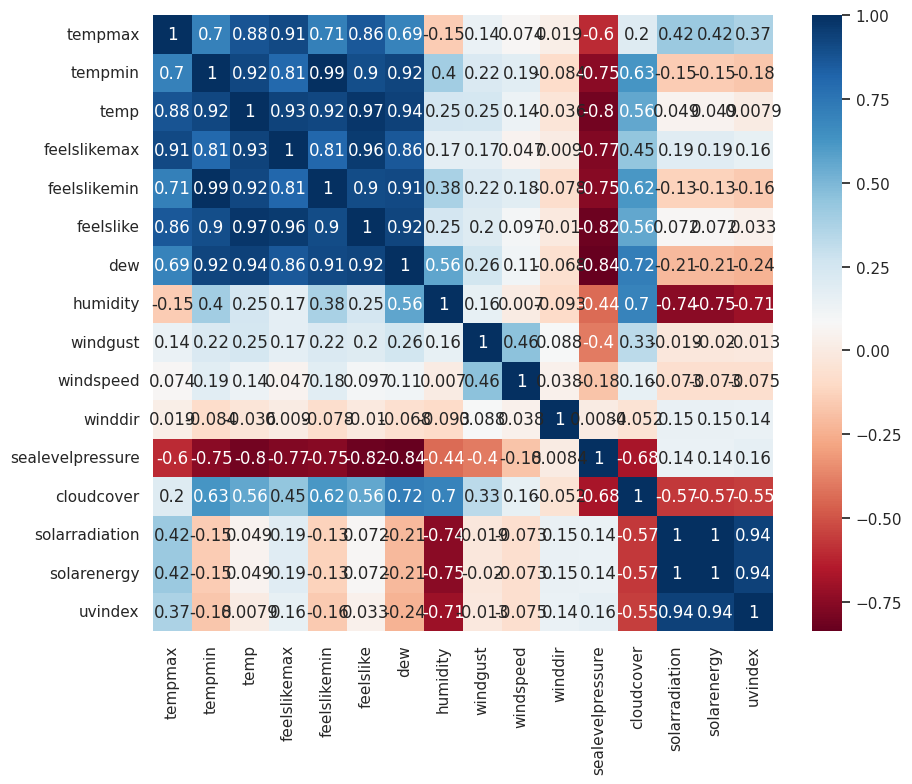

['temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'sealevelpressure',
 'solarenergy',
 'uvindex']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def high_correlated_cols(weather, plot=False, corr_th=0.80):
    # Select only the numeric columns from the weather
    numeric_weather = weather.select_dtypes(include=['number'])

    corr = numeric_weather.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        sns.set(rc={'figure.figsize': (10, 8)})
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.show()

    return drop_list

# Usage example:
high_correlated_cols(weather, plot=True)


In [ ]:
weather

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,1/1/2019,78.7,46.5,61.2,78.7,46.5,61.2,49.9,70.3,11.4,5.50,56.2,1018.5,0.5,183.7,15.9,7
1,1/2/2019,75.5,48.8,60.0,75.5,48.8,60.0,52.3,77.6,11.6,4.90,45.3,1018.4,3.4,179.7,15.4,7
2,1/3/2019,78.3,46.2,61.0,78.3,46.2,61.0,53.7,79.3,11.0,8.55,65.0,1018.8,2.4,178.5,15.4,7
3,1/4/2019,73.5,45.3,60.2,73.5,45.3,60.2,52.0,76.1,11.2,5.40,27.7,1019.5,3.2,177.1,15.1,7
4,1/5/2019,76.5,43.1,62.2,76.5,38.9,62.1,52.4,72.4,11.0,6.90,31.2,1017.7,5.7,183.4,15.9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,11/26/2024,81.6,60.2,70.1,82.9,60.2,70.3,62.9,80.0,12.1,4.30,39.4,1013.2,16.0,165.1,14.3,7
2157,11/27/2024,83.2,60.7,70.3,83.4,60.7,70.3,60.9,74.5,13.9,4.90,44.3,1012.8,44.0,179.2,15.4,7
2158,11/28/2024,85.0,60.9,71.5,84.8,60.9,71.6,61.7,73.4,13.4,5.40,49.5,1013.6,66.9,180.8,15.6,7
2159,11/29/2024,86.3,64.8,73.4,87.5,64.8,73.7,64.8,76.6,13.0,4.50,54.5,1013.9,17.9,175.1,15.2,7


In [ ]:
cols_drop = ["feelslikemin","feelslike","dew","sealevelpressure","solarenergy"]
weather.drop(cols_drop, axis = 1, inplace = True)
weather.head()

,datetime,tempmax,tempmin,temp,feelslikemax,humidity,windgust,windspeed,winddir,cloudcover,solarradiation,uvindex
0,1/1/2019,78.7,46.5,61.2,78.7,70.3,11.4,5.50,56.2,0.5,183.7,7
1,1/2/2019,75.5,48.8,60.0,75.5,77.6,11.6,4.90,45.3,3.4,179.7,7
2,1/3/2019,78.3,46.2,61.0,78.3,79.3,11.0,8.55,65.0,2.4,178.5,7
3,1/4/2019,73.5,45.3,60.2,73.5,76.1,11.2,5.40,27.7,3.2,177.1,7
4,1/5/2019,76.5,43.1,62.2,76.5,72.4,11.0,6.90,31.2,5.7,183.4,7


In [ ]:
weather.shape

(2161, 12)

In [ ]:
X = weather.drop(columns=['temp','datetime'], axis=1)
y = weather['temp']


In [ ]:
import sklearn
import feature_engine

print("scikit-learn version:", sklearn.__version__)
print("feature_engine version:", feature_engine.__version__)


scikit-learn version: 1.6.0
feature_engine version: 1.8.2


In [ ]:
# Drop constant features
def drop_constant_features(X):
    return X.loc[:, X.nunique() > 1]

# Drop correlated features
def drop_correlated_features(X, threshold=0.8):
    corr_matrix = X.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return X.drop(columns=to_drop)

# Drop duplicate features
def drop_duplicate_features(X):
    return X.loc[:, ~X.T.duplicated()]

# Apply transformations
X = drop_constant_features(X)
X = drop_correlated_features(X)
X = drop_duplicate_features(X)

print("Transformed X shape:", X.shape)


Transformed X shape: (2161, 8)


In [ ]:
print(X.columns)



Index(['tempmax', 'tempmin', 'humidity', 'windgust', 'windspeed', 'winddir',
       'cloudcover', 'solarradiation'],
      dtype='object')


In [ ]:
# Assuming X and y are defined as in your previous code (features and target variable)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Use DecisionTreeRegressor for regression
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42) # You can tune hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can further evaluate using other regression metrics like R-squared, etc.

# Example of hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_dt_model = grid_search.best_estimator_
y_pred_tuned = best_dt_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned}")

Mean Squared Error: 2.4818013856812913
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: -2.3434508004541934
Tuned Mean Squared Error: 2.2032976602190364


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming X and y are defined as in your previous code (features and target variable)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5) # You can tune n_neighbors
knn_model.fit(scaled_train_X, y_train)

# Make predictions
y_pred = knn_model.predict(scaled_test_X)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example of hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Try different values for k
    'weights': ['uniform', 'distance'] # Try different weighting methods
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(scaled_train_X, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_knn_model = grid_search.best_estimator_
y_pred_tuned = best_knn_model.predict(scaled_test_X)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned}")

Mean Squared Error: 2.104528406466515
Best parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score: -2.0961430483970593
Tuned Mean Squared Error: 2.0373492774167112


Mean Squared Error: 1.3208027848772566


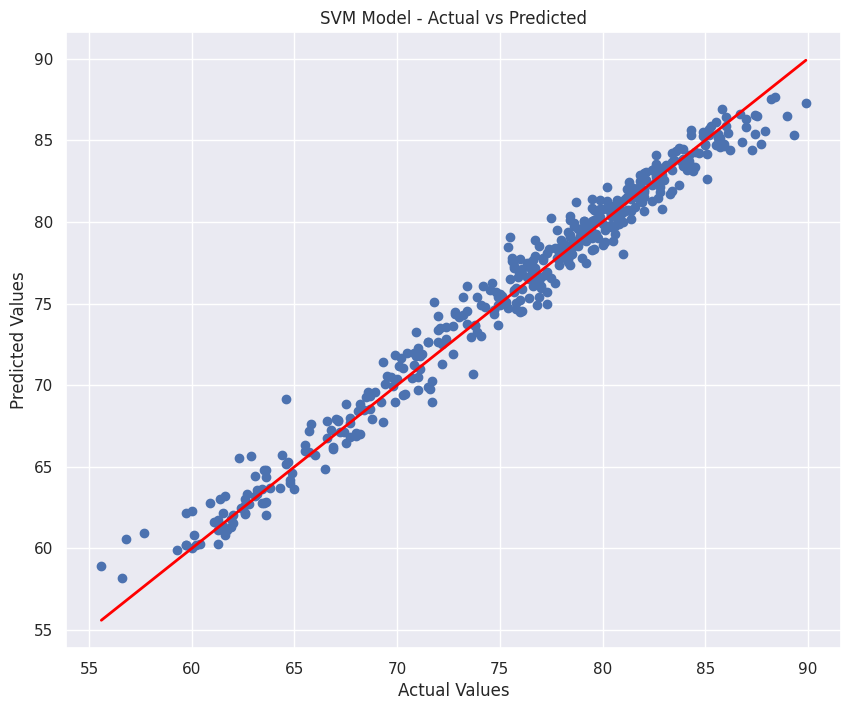

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train the Support Vector Machine (SVM) regression model
svm_model = SVR(kernel='rbf')  # Radial Basis Function kernel, commonly used in SVM regression

# Fit the model using the scaled training data
svm_model.fit(scaled_train_X, y_train)

# Make predictions on the testing data
predictions = svm_model.predict(scaled_test_X)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Optional: Visualize predictions vs actual values (for better understanding)
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVM Model - Actual vs Predicted")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.01, 0.1, 1],  # Kernel coefficient
    'epsilon': [0.01, 0.1]  # Margin of tolerance for errors
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(scaled_train_X, y_train)

# Get the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model from grid search for predictions
best_svm_model = grid_search.best_estimator_
predictions = best_svm_model.predict(scaled_test_X)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, predictions)
print(f"Tuned Mean Squared Error: {mse_tuned}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
Best cross-validation score: 0.9813217509232336
Tuned Mean Squared Error: 0.9640384452117147


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are defined as in your previous code (features and target variable)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0) # You can tune the regularization strength (alpha)
ridge_model.fit(scaled_train_X, y_train)

# Make predictions
y_pred = ridge_model.predict(scaled_test_X)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example of hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.1, 1.0, 10.0] # Try different values for alpha
}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(scaled_train_X, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_ridge_model = grid_search.best_estimator_
y_pred_tuned = best_ridge_model.predict(scaled_test_X)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Tuned Mean Squared Error: {mse_tuned}")

Mean Squared Error: 1.6385114826029352
Best parameters: {'alpha': 1.0}
Best cross-validation score: -1.6198012107554542
Tuned Mean Squared Error: 1.6385114826029352


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2


# Evaluate all models
models = {
    "Decision Tree (Initial)": dt_model,
    "Decision Tree (Tuned)": best_dt_model,
    "KNN (Initial)": knn_model,
    "KNN (Tuned)": best_knn_model,
    "SVM (Initial)": svm_model,
    "SVM (Tuned)": best_svm_model,
    "Ridge (Initial)": ridge_model,
    "Ridge (Tuned)": best_ridge_model
}

results = []
for model_name, model in models.items():
    if model_name in ["KNN (Initial)", "KNN (Tuned)", "SVM (Initial)", "SVM (Tuned)", "Ridge (Initial)", "Ridge (Tuned)"]:
        mse, rmse, mae, r2 = evaluate_model(model, scaled_test_X, y_test)
    else:
        mse, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    results.append([model_name, mse, rmse, mae, r2])

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "MAE", "R-squared"])
results_df

,Model,MSE,RMSE,MAE,R-squared
0,Decision Tree (Initial),2.481801,1.575373,1.166282,0.957420
1,Decision Tree (Tuned),2.203298,1.484351,1.092841,0.962198
2,KNN (Initial),2.104528,1.450699,1.073626,0.963893
3,KNN (Tuned),2.037349,1.427357,1.072188,0.965046
4,SVM (Initial),1.320803,1.149262,0.879149,0.977339
5,SVM (Tuned),0.964038,0.981855,0.748563,0.983460
6,Ridge (Initial),1.638511,1.280044,1.028745,0.971888
7,Ridge (Tuned),1.638511,1.280044,1.028745,0.971888
